In [1]:
#数据加载
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255) #归一化操作
training_set=train_datagen.flow_from_directory('./cats_dogs/training_set',target_size=(50,50),batch_size=32,class_mode='binary')

Found 8005 images belonging to 2 classes.


In [2]:
#查看数据类型
print(type(training_set))   #文件生成器

<class 'keras.preprocessing.image.DirectoryIterator'>


In [3]:
#每个批次的样本数量
print(training_set.batch_size)

32


In [4]:
#加载的图片名称
print(training_set.filenames)

['cats\\cats_1.jpg', 'cats\\cats_10.jpg', 'cats\\cats_100.jpg', 'cats\\cats_1000.jpg', 'cats\\cats_1001.jpg', 'cats\\cats_1002.jpg', 'cats\\cats_1003.jpg', 'cats\\cats_1004.jpg', 'cats\\cats_1005.jpg', 'cats\\cats_1006.jpg', 'cats\\cats_1007.jpg', 'cats\\cats_1008.jpg', 'cats\\cats_1009.jpg', 'cats\\cats_101.jpg', 'cats\\cats_1010.jpg', 'cats\\cats_1011.jpg', 'cats\\cats_1012.jpg', 'cats\\cats_1013.jpg', 'cats\\cats_1014.jpg', 'cats\\cats_1015.jpg', 'cats\\cats_1016.jpg', 'cats\\cats_1017.jpg', 'cats\\cats_1018.jpg', 'cats\\cats_1019.jpg', 'cats\\cats_102.jpg', 'cats\\cats_1020.jpg', 'cats\\cats_1021.jpg', 'cats\\cats_1022.jpg', 'cats\\cats_1023.jpg', 'cats\\cats_1024.jpg', 'cats\\cats_1025.jpg', 'cats\\cats_1026.jpg', 'cats\\cats_1027.jpg', 'cats\\cats_1028.jpg', 'cats\\cats_1029.jpg', 'cats\\cats_103.jpg', 'cats\\cats_1030.jpg', 'cats\\cats_1031.jpg', 'cats\\cats_1032.jpg', 'cats\\cats_1033.jpg', 'cats\\cats_1034.jpg', 'cats\\cats_1035.jpg', 'cats\\cats_1036.jpg', 'cats\\cats_1037.jp

In [5]:
print(training_set.filepaths)

['./cats_dogs/training_set\\cats\\cats_1.jpg', './cats_dogs/training_set\\cats\\cats_10.jpg', './cats_dogs/training_set\\cats\\cats_100.jpg', './cats_dogs/training_set\\cats\\cats_1000.jpg', './cats_dogs/training_set\\cats\\cats_1001.jpg', './cats_dogs/training_set\\cats\\cats_1002.jpg', './cats_dogs/training_set\\cats\\cats_1003.jpg', './cats_dogs/training_set\\cats\\cats_1004.jpg', './cats_dogs/training_set\\cats\\cats_1005.jpg', './cats_dogs/training_set\\cats\\cats_1006.jpg', './cats_dogs/training_set\\cats\\cats_1007.jpg', './cats_dogs/training_set\\cats\\cats_1008.jpg', './cats_dogs/training_set\\cats\\cats_1009.jpg', './cats_dogs/training_set\\cats\\cats_101.jpg', './cats_dogs/training_set\\cats\\cats_1010.jpg', './cats_dogs/training_set\\cats\\cats_1011.jpg', './cats_dogs/training_set\\cats\\cats_1012.jpg', './cats_dogs/training_set\\cats\\cats_1013.jpg', './cats_dogs/training_set\\cats\\cats_1014.jpg', './cats_dogs/training_set\\cats\\cats_1015.jpg', './cats_dogs/training_set\

In [6]:
#确认标签
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [7]:
#training-set[][][] 第一个为第几个批次；第二个为确定输入X还是y；第三个用于确定第几个样本
print(training_set[0][1])

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0.]


In [8]:
#第一个批次第一个样本的输入内容
print(training_set[0][0].shape)
print(training_set[0][0][0,:,:].shape)
print(training_set[0][0][0,:,:])

(32, 50, 50, 3)
(50, 50, 3)
[[[0.9960785  1.         0.9921569 ]
  [0.98823535 1.         1.        ]
  [0.98823535 1.         0.9921569 ]
  ...
  [0.9843138  1.         0.9921569 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9960785  1.         1.        ]
  [1.         0.90196085 0.8705883 ]
  [0.69411767 0.3372549  0.2627451 ]
  ...
  [0.9294118  0.7176471  0.6784314 ]
  [0.9960785  0.9960785  0.9960785 ]
  [1.         1.         1.        ]]

 [[0.9960785  1.         0.9921569 ]
  [1.         0.8862746  0.8705883 ]
  [0.2392157  0.1137255  0.05490196]
  ...
  [0.64705884 0.24313727 0.1764706 ]
  [0.97647065 1.         0.9843138 ]
  [1.         0.9960785  1.        ]]

 ...

 [[1.         0.9843138  0.9921569 ]
  [0.9843138  1.         0.9450981 ]
  [0.68235296 0.10588236 0.03529412]
  ...
  [0.80392164 0.45098042 0.4156863 ]
  [0.9725491  1.         1.        ]
  [0.97647065 1.         0.9921569 ]]

 [[1.         0.9921569  0.9843138 ]
  [0.9686

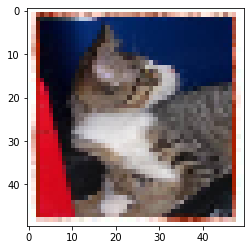

In [9]:
#可视化第一个批次第一个图片
from matplotlib import pyplot as plt
fig1=plt.figure()
plt.imshow(training_set[0][0][0,:,:])

In [10]:
#加载后按批次存放的每个样本对应的索引号
print(training_set.index_array)

[1252 6952  531 ... 1330  498 3805]


In [11]:
print(training_set.filenames[419])

cats\cats_1376.jpg


In [12]:
#建立CNN模型
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
#创建实例
cnn_model=Sequential()
#添加卷积层
cnn_model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu')) #默认s=1
#添加池化层
cnn_model.add(MaxPool2D(pool_size=(2,2)))
#添加卷积层
cnn_model.add(Conv2D(32,(3,3),activation='relu')) #默认s=1
#添加池化层
cnn_model.add(MaxPool2D(pool_size=(2,2)))
#flattenz展开
cnn_model.add(Flatten())
#FC层（全连接层？）
cnn_model.add(Dense(units=128,activation='relu'))
#输出层
cnn_model.add(Dense(units=1,activation='sigmoid'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [13]:
#模型配置***
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#模型训练
cnn_model.fit_generator(training_set,epochs=20)

Epoch 1/20


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6200/2000878449.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(training_set,epochs=20)


251/251 [==============================] - 22s 86ms/step - loss: 0.6532 - accuracy: 0.6026
Epoch 2/20
251/251 [==============================] - 6s 25ms/step - loss: 0.5608 - accuracy: 0.7129
Epoch 3/20
251/251 [==============================] - 7s 27ms/step - loss: 0.5029 - accuracy: 0.7557
Epoch 4/20
251/251 [==============================] - 7s 27ms/step - loss: 0.4605 - accuracy: 0.7819
Epoch 5/20
251/251 [==============================] - 7s 28ms/step - loss: 0.4284 - accuracy: 0.7986
Epoch 6/20
251/251 [==============================] - 7s 28ms/step - loss: 0.3791 - accuracy: 0.8244
Epoch 7/20
251/251 [==============================] - 7s 27ms/step - loss: 0.3310 - accuracy: 0.8557
Epoch 8/20
251/251 [==============================] - 7s 27ms/step - loss: 0.2779 - accuracy: 0.8817
Epoch 9/20
251/251 [==============================] - 7s 26ms/step - loss: 0.2410 - accuracy: 0.8987
Epoch 10/20
251/251 [==============================] - 7s 28ms/step - loss: 0.1881 - accuracy: 0.9272

In [15]:
#训练集数据预测准确率
accuracy_train = cnn_model.evaluate_generator(training_set)
print(accuracy_train)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6200/4066966651.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_train = cnn_model.evaluate_generator(training_set)


[0.0017384662060067058, 1.0]


In [16]:
#模型存储
cnn_model.save('cats_dogs.h5')

In [17]:
#模型加载***自己建立的模型
from keras.models import load_model
model_new=load_model('cats_dogs.h5')  

In [18]:
#测试数据集预测准确率
test_set=train_datagen.flow_from_directory('./cats_dogs/test_set',target_size=(50,50),batch_size=32,class_mode='binary')

Found 2003 images belonging to 2 classes.


In [19]:
accuracy_test = cnn_model.evaluate_generator(test_set)
print(accuracy_test)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6200/1329715611.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_test = cnn_model.evaluate_generator(test_set)


[1.3959784507751465, 0.7608587145805359]


In [24]:
#单张图片的预测
from keras.preprocessing.image import load_img, img_to_array
pic_1 = '1.png'
pic_1 = load_img(pic_1,target_size=(50,50))
pic_1 = img_to_array(pic_1)
pic_1 = pic_1/255
pic_1 = pic_1.reshape(1,50,50,3)
#预测
result = (cnn_model.predict(pic_1) > 0.5).astype("int32")
print('dog' if result==1 else 'cat')

dog


In [25]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


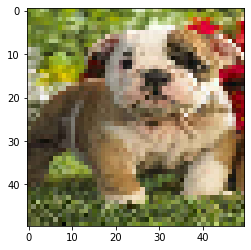

In [26]:
fig2=plt.figure()
plt.imshow(pic_1[0])

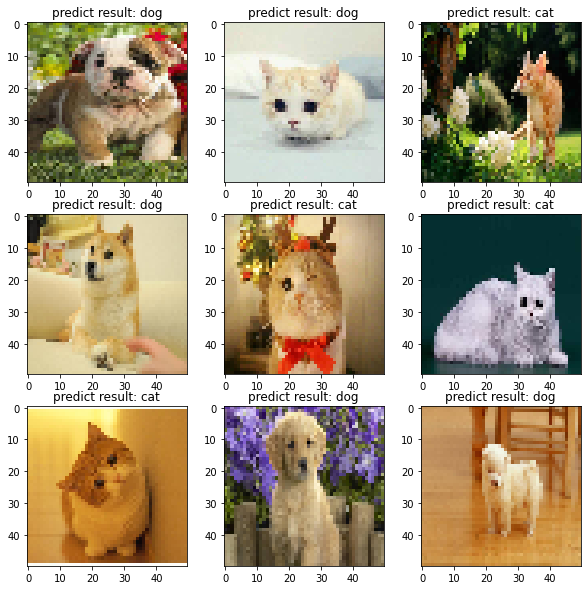

In [27]:
#本地9张图片处理
a = [i for i in range(1,10)]
fig3 = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.png'
    pic_1 = load_img(img_name,target_size=(50,50))
    pic_1 = img_to_array(pic_1)
    pic_1 = pic_1/255
    pic_1 = pic_1.reshape(1,50,50,3)
    result = (cnn_model.predict(pic_1) > 0.5).astype("int32")
    #print('dog' if result==1 else 'cat')
    plt.subplot(3,3,i)
    plt.imshow(pic_1[0])
    plt.title('predict result: dog' if result==1 else 'predict result: cat')